# Module 5

In [393]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

On reprend la fonction de Poisson de la leçon numéro 2 (Poisson Equation) qui génère l'environnement approprié.

In [1]:
def poisson_IG(nx, ny, L, H):

    # Mesh
    x  = numpy.linspace(0,L,nx)
    y  = numpy.linspace(0,H,ny)
    X,Y = numpy.meshgrid(x,y)

    # Initialize
    psi_i  = numpy.zeros((ny,nx))
    w = numpy.zeros((ny,nx))

    return X, Y, x, y, psi_i, w_i

Les assignations proposées pour le code: un intervalle x allant de 0 à l(=1), un intervalle y allant de 0 à h(=1).

Nous séparons ces intervalles en 41 étapes et nous définissons dx et dy comme étant la distance séparant les points voisins.

La précision donnée pour arrêter l'itération est de $10^{-6}$

In [395]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [396]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

La fonction principale du devoir génère des valeurs pour $\psi$ et $\omega$. La boucle while continue de calculer jusqu'à ce que les convergences des fonctions $\psi$ et $\omega$ soient inférieures à l1_target = 1e-6.

On calcule donc les 2 normes (l1_norm et l2_norm) à l'aide de la fonction L1norm(new, old) (définie plus haut). Lorsque l'une des deux est supérieure à l1_target, une nouvelle itération à lieu et la boucle continue.

Par après, nous écrivons les fonctions pour $\psi$ et $\omega$, telles que décrites dans les leçons 1 et 2, qui sont respectivement des équations de Poisson et Laplace.

\begin{equation} 
\omega_{i,j}^{k+1}=\frac14\left(
\omega_{i,j+1}^{k}+
\omega_{i,j-1}^{k}+
\omega_{i-1,j}^{k}+
\omega_{i+1,j}^{k}
\right)
\end{equation}

\begin{equation} 
\psi_{i,j}^{k+1}=\frac
    {\left(\psi_{i+1,j}^{k}+\psi_{i-1,j}^{k}\right)\Delta y^2
        +\left(\psi_{i,j+1}^{k}+\psi_{i,j-1}^{k}\right)\Delta x^2
        -\omega_{i,j}^{k}\Delta x^2\Delta y^2}
    {2\left(\Delta x^2+\Delta y^2\right)}
\end{equation}

Nous imposons aussi les conditions au bord d'$\omega$ qui sont déterminées par l'équation suivante :

\begin{equation}
\omega_{i,j}=-\frac{1}{2\Delta y^2}\left(8\,\psi_{i,j-1}-\psi_{i,j-2}\right)
-\frac{3u_j}{\Delta y}
\end{equation}

Il faut changer les indices selon le bord considéré en tenant compte de la bonne valeur pour $u_j$ (qui est nulle partout sauf  en $y=h$ où $u = 1$).

In [3]:
def poisson_2d(psi, w, dx, dy, l1_target):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    psi : 2D array of floats
        Initial guess psi
    w : 2D aray of floats
        Initial guess of w
    dx : float
        Mesh spacing in x direction
    dy : float
        Mesh spacing in y direction
    l1_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    psi, w : 2D array of floats
        Distribution after relaxation
    l1_conv, l2_conv : array of floats
        Convergence value of psi and w
    '''
    l1_norm = 1
    l2_norm = 1
    iterations = 0
    l1_conv = []
    l2_conv = []
    u = 1
    
    while l1_norm > l1_target or l2_norm > l1_target:

        psid = psi.copy()
        wd = w.copy()

        psi[1:-1,1:-1] = 1./(2.*(dx**2 + dy**2)) * \
                         ((psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 +\
                         (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 -\
                         -wd[1:-1,1:-1]*dx**2*dy**2)
        
        w[1:-1,1:-1] = .25 * (wd[1:-1,2:] + wd[1:-1, :-2] \
                              + wd[2:, 1:-1] + wd[:-2, 1:-1])
        
        ##Neumann B.C.
        
        # top (here u=1)
        w[-1,1:-1]=(-1/(2*dy**2)*((8.*psi[-2,1:-1])-psi[-3,1:-1]))-((3.*u)/dy)
        
        # bottom
        w[0,1:-1]=(-1/(2*dy**2)*((8.*psi[1, 1:-1])-psi[2,1:-1]))
        
        # right
        w[1:-1,-1]=(-1/(2*dy**2)*((8.*psi[1:-1,-2])-psi[1:-1,-3]))
        
        # left
        w[1:-1,0]=(-1/(2*dy**2)*((8.*psi[1:-1, 1])-psi[1:-1,2]))
        
        l1_norm = L1norm(psi,psid)
        l2_norm = L1norm(w,wd)
        iterations += 1
        l1_conv.append(l1_norm)
        l2_conv.append(l2_norm)
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return psi, w, l1_conv, l2_conv

In [483]:
from laplace_helper import plot_3D

In [453]:
X, Y, x, y, psi_i, w_i = poisson_IG(nx, ny, l, h)

In [466]:
psi, w, l1_conv, l2_conv = poisson_2d(psi_i.copy(), w_i.copy(), dx, dy, l1_target)

Number of Jacobi iterations: 4060


Nous en sommes donc à plus de 4000 itérations, ce qui est du même ordre de grandeur que le nombre obtenu dans l'exemple de la leçon 2 (3125 itération).

Pour vérifier que la fonction s'arrête quand nécessaire, nous vérifions les valeurs des derniers termes de la convergence de $\psi$ et $\omega$ (voir ci-dessous).

In [502]:
l1_conv[-1]<l1_target

True

In [503]:
l2_conv[-1]<l1_target

True

In [504]:
l2_conv[-2]<l1_target

False

Dans notre cas, c'est la convergence de la fonction $\omega$ qui termine la boucle while (l2_conv).

Comme expliqué fin de la leçon 5, le résultat final doit ressembler à la Figure 2 (qui se trouve au bas de la même leçon).

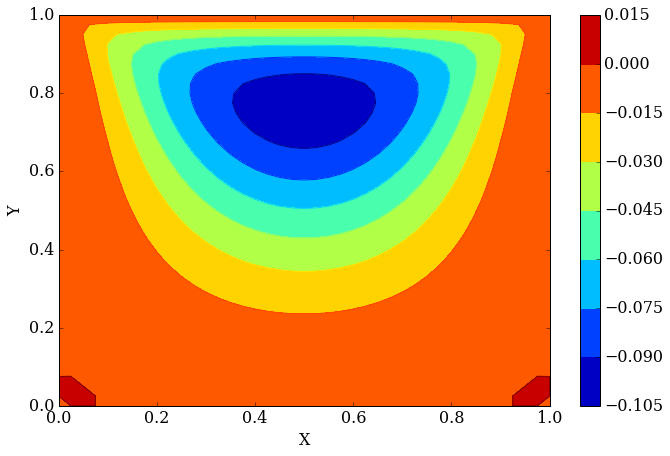

In [505]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
pyplot.contourf(X,Y,psi,alpha=1)
pyplot.colorbar()
pyplot.contour(X,Y,psi)
pyplot.xlabel('X')
pyplot.ylabel('Y');

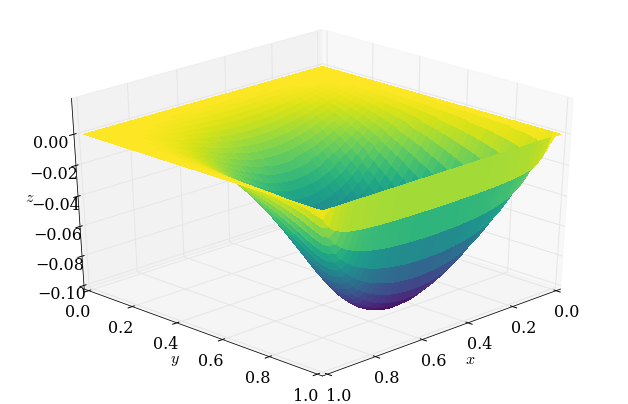

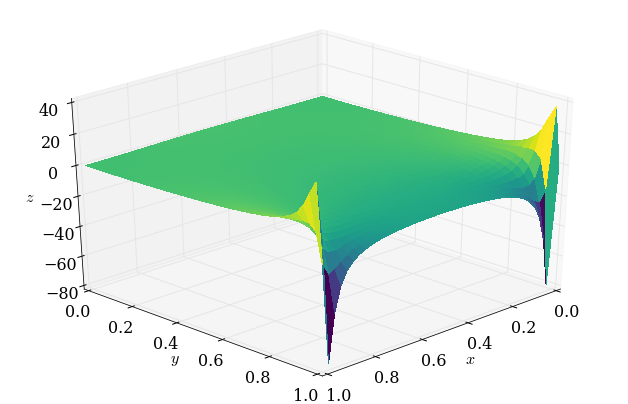

In [467]:
plot_3D(x,y,psi)
plot_3D(x,y,w)

Les fonctions ci-dessous nous permettent de resortir la donnée pour les maximums de la valeur absolue des fonctions $\psi$ et $\omega$.

In [493]:
psi.flat[abs(psi).argmax()]

-0.099845172462224338

In [494]:
w.flat[abs(w).argmax()]

-78.192661228600699

La fonction ci-dessous sort, à la 32éme valeur de y( = 0.8), celles de x tous les 8 intervalles arrondies à la 4ème décimale.

In [508]:
numpy.round(psi[32,::8],4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])